In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('/content/drive/MyDrive/mscds part-2/new dataset.csv')

# Split the data into features (X) and target (y)
X = data.drop(['nameOrig','isFraud','nameDest','isFlaggedFraud'], axis=1)
# X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

#dict = {'name': nme, 'degree': deg, 'score': scr}
#df = pd.DataFrame(dict)#
#df.to_csv('file1.csv')#

# Convert y to a numpy array
y = np.array(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

# Convert categorical variables to numeric
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier with class weights
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the classifier
clf.fit(X_train, y_train)

# Predict the target
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       0.00      0.00      0.00         1

    accuracy                           0.99       100
   macro avg       0.49      0.50      0.50       100
weighted avg       0.98      0.99      0.99       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ARIMA MODEL

Columns in dataset: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


<ipython-input-3-b07977af89f8>:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['transaction_time'] = pd.date_range(start=start_date, periods=len(data), freq='H')
<ipython-input-3-b07977af89f8>:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data['amount'].resample('H').sum()


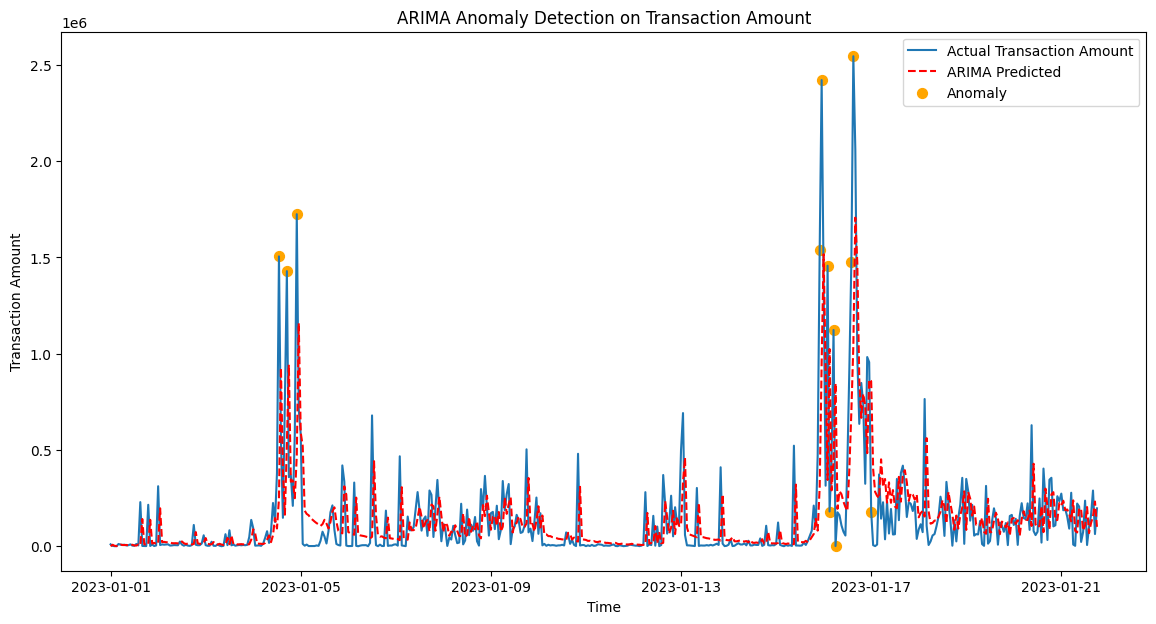

In [ ]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the data
file_path = '/content/drive/MyDrive/mscds part-2/new dataset.csv'
data = pd.read_csv(file_path)

# Check the columns in the dataset
print("Columns in dataset:", data.columns)

# Verify that the 'amount' column exists and contains numerical values
if 'amount' not in data.columns:
    raise KeyError("Column 'amount' not found in the dataset.")

# Convert 'amount' column to numeric (in case of non-numeric values)
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Step 3: Data Preprocessing
# Assuming each 'step' represents an hour, create a datetime index starting from an arbitrary date
start_date = '2023-01-01'  # Choose a start date (adjust if needed)
data['transaction_time'] = pd.date_range(start=start_date, periods=len(data), freq='H')

# Set 'transaction_time' as the index
data.set_index('transaction_time', inplace=True)

# Aggregate data by hour
hourly_data = data['amount'].resample('H').sum()

# Step 4: Apply ARIMA Model
arima_order = (1, 1, 1)
arima_model = ARIMA(hourly_data, order=arima_order)
arima_result = arima_model.fit()

# Step 5: Forecast and calculate residuals for anomaly detection
hourly_data = hourly_data.to_frame(name='amount')
hourly_data['predicted'] = arima_result.predict(start=hourly_data.index[0], end=hourly_data.index[-1])
hourly_data['residual'] = hourly_data['amount'] - hourly_data['predicted']

# Define anomaly threshold
threshold = 3 * np.std(hourly_data['residual'])
hourly_data['anomaly'] = (hourly_data['residual'].abs() > threshold).astype(int)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(hourly_data['amount'], label='Actual Transaction Amount')
plt.plot(hourly_data['predicted'], color='red', linestyle='--', label='ARIMA Predicted')

# Isolate anomalies for plotting
anomalies = hourly_data[hourly_data['anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['amount'], color='orange', label='Anomaly', s=50)

# Add titles and labels
plt.title('ARIMA Anomaly Detection on Transaction Amount')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

Data Preprocessing

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = '/content/drive/MyDrive/mscds part-2/new dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# 1. Handling Missing Values
df_cleaned = df.dropna()

# 2. Separate numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# 3. Encode Categorical Variables (Label Encoding or One-Hot Encoding)
label_encoder = LabelEncoder()

# Example: Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# 4. Feature Scaling: Only scale numerical columns
scaler = StandardScaler()

# Scale only the numerical columns
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# 5. Display processed data
print("\nPreprocessed data (first 5 rows):")
print(df_cleaned.head())

First 5 rows of the dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

Preprocessed data (first 5 rows):
   step  type    amount  nameOrig  oldbal

Isolation forest

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = '/content/drive/MyDrive/mscds part-2/new dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# 1. Handling Missing Values
df_cleaned = df.dropna()

# 2. Separate numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# 3. Encode Categorical Variables (Label Encoding or One-Hot Encoding)
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# 4. Feature Scaling: Only scale numerical columns
scaler = StandardScaler()

# Scale only the numerical columns
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# 5. Apply Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination level
df_cleaned['anomaly'] = isolation_forest.fit_predict(df_cleaned[numerical_cols])

# The 'anomaly' column contains -1 for anomalies and 1 for normal data points
# Display the number of anomalies detected
anomalies = df_cleaned[df_cleaned['anomaly'] == -1]
normal_data = df_cleaned[df_cleaned['anomaly'] == 1]

print(f"\nNumber of anomalies detected: {len(anomalies)}")
print(f"Number of normal points: {len(normal_data)}")

# Display anomalies
print("\nAnomalies detected (first 5 rows):")
print(anomalies.head())

# Optionally, save the data with the anomaly column
df_cleaned.to_csv('/content/drive/MyDrive/mscds part-2/processed_with_anomalies.csv', index=False)

First 5 rows of the dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

Number of anomalies detected: 25
Number of normal points: 474

Anomalies de

Long Short Term Memory

First 5 rows of the dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0137 - val_loss: 0.0042
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019 - val_loss: 5.9952e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.6408e-04 - val_loss: 3.1127e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.1966e-04 - val_loss: 1.5075e-04
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7969e-04 - val_loss: 1.0505e-04
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.3415e-04 - val_loss: 8.2771e-05
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.3965e-05 - val_loss: 9.0820e-05
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9535e-05 - val_loss: 7.8246e-05
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.7879e-05 - val_loss: 7.0577e-05
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.7349e-05 - val_loss: 6.8242e-05
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4483e-05 - val_los

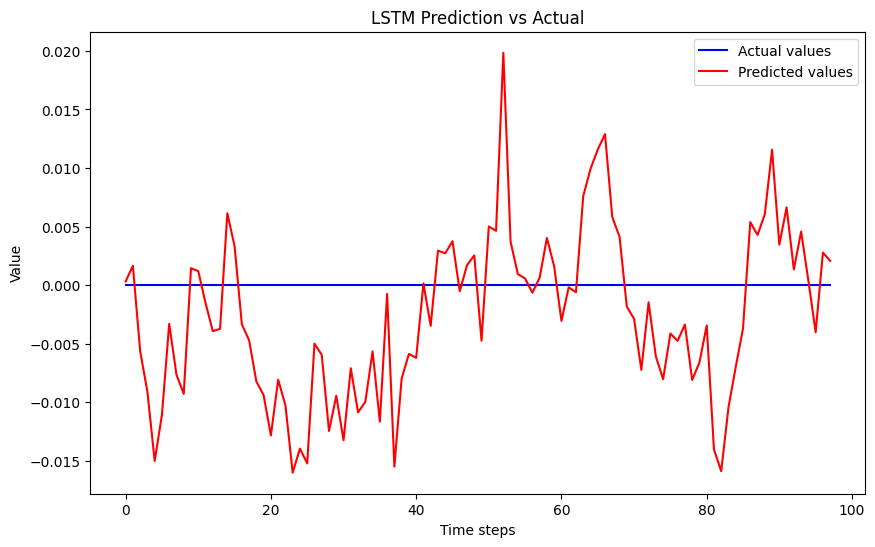

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
file_path = '/content/drive/MyDrive/mscds part-2/new dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Step 1: Preprocessing
# Drop any missing values
df_cleaned = df.dropna()

# Step 2: Separate numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Step 3: Encode categorical columns (if needed)
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Step 4: Normalize only the numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Convert the data into a time-series format for LSTM
# Define the number of time steps (how many previous points to consider for prediction)
time_steps = 10  # Example: 10 previous time steps used for prediction

def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :-1])  # All features except the last column
        y.append(data[i + time_steps, -1])     # The target column
    return np.array(X), np.array(y)

# Convert DataFrame to NumPy array
scaled_data = df_cleaned.values

# Create time-series data
X, y = create_time_series(scaled_data, time_steps)

# Step 5: Split data into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 6: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer

# Step 7: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 9: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 10: Inverse scaling to get back to original values
y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)


target_scaler = MinMaxScaler()

# Fit the target scaler on the original target column (before scaling)
df_cleaned_target = df_cleaned[df_cleaned.columns[-1]].values.reshape(-1, 1)
target_scaler.fit(df_cleaned_target)

# Now perform the inverse transform
y_pred_rescaled = target_scaler.inverse_transform(y_pred_reshaped)
y_test_rescaled = target_scaler.inverse_transform(y_test_reshaped)

# Step 11: Evaluate the model (optional)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error: {mse}")

# Step 12: Plot the actual vs predicted values (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, color='blue', label='Actual values')
plt.plot(y_pred_rescaled, color='red', label='Predicted values')
plt.title('LSTM Prediction vs Actual')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.legend()
plt.show()

Autoencoders

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1909 - val_loss: 0.1608
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1506 - val_loss: 0.1264
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0792 - val_loss: 0.1089
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0367 - val_loss: 0.1098
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0302 - val_loss: 0.1136
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0302 - val_loss: 0.1113
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0276 - val_loss: 0.1071
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0227 - val_loss: 0.1059
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0192 - val_loss: 0.1015
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0229 - val_loss: 0.0970
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0181 - val_loss: 0.0970
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

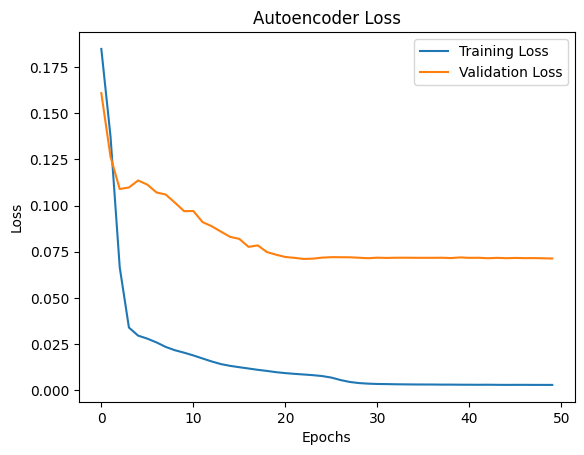

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Number of anomalies detected: 25
Anomalies detected (first 5 rows):
     step  type     amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
430     1     0  355294.50       226     6962604.61      7317899.11        88   
431     1     0   12336.48        61     7317899.11      7330235.59       105   
432     1     0  349505.89       198     7330235.59      7679741.48        32   
433     1     0  285185.34        77     7679741.48      7964926.82        22   
434     1     0  132953.45       252     7964926.82      8097880.27        23   

     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  anomaly  
430      1469965.20      1567434.81        0               0     True  
431        21024.00        83845.22        0               0     True  
432     17000000.00     19200000.00        0               0     True  
433       451065.09       353532.56        0               0     True  
434      1617722.17        16518.36        0  

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/mscds part-2/new dataset.csv'
df = pd.read_csv(file_path)

# Step 1: Preprocessing
# Drop any missing values
df_cleaned = df.dropna()

# Separate numerical and categorical columns (if needed)
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Encode categorical variables if necessary (LabelEncoder or One-Hot Encoding)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Scale the data using MinMaxScaler (to [0, 1] range)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Step 2: Build the Autoencoder
# Define the number of input features
input_dim = scaled_data.shape[1]

# Define the Autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(32, activation="relu")(encoder)
encoder = Dense(16, activation="relu")(encoder)

decoder = Dense(32, activation="relu")(encoder)
decoder = Dense(64, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Step 3: Train the Autoencoder
# Use the scaled data as both the input and output (since it's unsupervised)
history = autoencoder.fit(scaled_data, scaled_data,
                          epochs=50,
                          batch_size=32,
                          validation_split=0.2,
                          verbose=1)

# Step 4: Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 5: Use the autoencoder to make predictions (reconstruction)
reconstructed_data = autoencoder.predict(scaled_data)

# Step 6: Calculate the reconstruction error
reconstruction_error = np.mean(np.abs(scaled_data - reconstructed_data), axis=1)

# Step 7: Anomaly detection
# Set a threshold for the reconstruction error (you can set it based on a statistical approach or domain knowledge)
threshold = np.percentile(reconstruction_error, 95)  # 95th percentile

# Label data as anomaly if reconstruction error exceeds the threshold
anomalies = reconstruction_error > threshold

# Print the number of detected anomalies
print(f"Number of anomalies detected: {np.sum(anomalies)}")

# Optionally save the dataset with anomaly labels
df_cleaned['anomaly'] = anomalies
df_cleaned.to_csv('/content/drive/MyDrive/mscds part-2/autoencoder_anomalies.csv', index=False)

# Display some anomalies
print("Anomalies detected (first 5 rows):")
print(df_cleaned[df_cleaned['anomaly'] == True].head())


In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier, IsolationForest
import joblib
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential, Model, load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Function to save sklearn models
def save_sklearn_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# Function to save preprocessors
def save_preprocessor(preprocessor, filename):
    with open(filename, 'wb') as file:
        pickle.dump(preprocessor, file)

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/mscds part-2/new dataset.csv')

# 1. Random Forest Model
# Prepare data
X = data.drop(['nameOrig','isFraud','nameDest','isFlaggedFraud'], axis=1)
y = data['isFraud']

# Convert categorical variables to numeric
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

# Save the label encoder
save_preprocessor(le, '/content/drive/MyDrive/mscds part-2/label_encoder.pkl')

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X, y)

# Save the model
save_sklearn_model(rf_model, '/content/drive/MyDrive/mscds part-2/random_forest_model.pkl')

# 2. Isolation Forest Model
# Prepare data
df_cleaned = data.dropna()
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Encode categorical variables
for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Scale numerical features
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Save the scaler
save_preprocessor(scaler, '/content/drive/MyDrive/mscds part-2/standard_scaler.pkl')

# Train isolation forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(df_cleaned[numerical_cols])

# Save the model
save_sklearn_model(iso_forest, '/content/drive/MyDrive/mscds part-2/isolation_forest_model.pkl')

# 3. ARIMA Model
# This is a bit different as it's not a sklearn model
# For ARIMA, we'll create a function to fit the model at runtime
# But we can save the parameters
arima_params = {
    'order': (1, 1, 1),
    'threshold_multiplier': 3  # For anomaly detection
}

with open('/content/drive/MyDrive/mscds part-2/arima_params.pkl', 'wb') as file:
    pickle.dump(arima_params, file)

# 4. LSTM Model
# Save the LSTM model
# Assuming you've already defined and trained your LSTM model
# model.save('lstm_model.h5')

# 5. Autoencoder Model
# Save the autoencoder model
# Assuming you've already defined and trained your autoencoder model
# autoencoder.save('autoencoder_model.h5')

print("All models have been saved successfully!")

All models have been saved successfully!


In [ ]:
import pickle
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Function to save a Keras model
def save_keras_model(model, filename):
    model.save(filename)  # Save model in HDF5 format
    print(f"Model saved as {filename}")

# Function to save scaler using pickle
def save_preprocessor(preprocessor, filename):
    with open(filename, 'wb') as file:
        pickle.dump(preprocessor, file)
    print(f"Preprocessor saved as {filename}")

# Load dataset
file_path = '/content/drive/MyDrive/mscds part-2/new dataset.csv'
df = pd.read_csv(file_path)

# Step 1: Preprocessing
df_cleaned = df.dropna()  # Drop missing values

# Step 2: Convert categorical columns to numeric
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Step 3: Normalize numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Save the scaler
save_preprocessor(scaler, '/content/drive/MyDrive/mscds part-2/scaler.pkl')

# Convert the DataFrame to a NumPy array (ensure no object dtypes remain)
scaled_data = df_cleaned.to_numpy()

# Step 4: Convert data into a time-series format for LSTM
time_steps = 10
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :-1])  # All features except the last column
        y.append(data[i + time_steps, -1])     # The target column
    return np.array(X), np.array(y)

X, y = create_time_series(scaled_data, time_steps)

# Step 5: Split data into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# **LSTM Model**
lstm_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Corrected input layer
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save LSTM Model
save_keras_model(lstm_model, '/content/drive/MyDrive/mscds part-2/lstm_model.h5')

# **Autoencoder Model**
input_dim = scaled_data.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(32, activation="relu")(encoder)
encoder = Dense(16, activation="relu")(encoder)
decoder = Dense(32, activation="relu")(encoder)
decoder = Dense(64, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(scaled_data, scaled_data, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Save Autoencoder Model
save_keras_model(autoencoder, '/content/drive/MyDrive/mscds part-2/autoencoder_model.h5')

print("All models have been saved successfully!")


In [ ]:
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.models import load_model
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Function to load sklearn models
def load_sklearn_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Function to load preprocessors
def load_preprocessor(filename):
    with open(filename, 'rb') as file:
        preprocessor = pickle.load(file)
    return preprocessor

# Load the test data (replace with your actual test data path)
test_data_path = '/content/drive/MyDrive/mscds part-2/new dataset.csv'
test_data = pd.read_csv(test_data_path)

# ----- 1. Random Forest Model Prediction -----
def predict_with_random_forest(test_data):
    print("Making predictions with Random Forest model...")
    # Load the random forest model
    rf_model = load_sklearn_model('/content/drive/MyDrive/mscds part-2/random_forest_model.pkl')
    # Load the label encoder
    le = load_preprocessor('/content/drive/MyDrive/mscds part-2/label_encoder.pkl')

    # Prepare test data (similar to training)
    X_test = test_data.drop(['isFraud', 'isFlaggedFraud'], axis=1, errors='ignore')

    # Encode categorical variables
    for column in X_test.columns:
        if X_test[column].dtype == 'object':
            X_test[column] = le.fit_transform(X_test[column])

    # Make predictions
    fraud_predictions = rf_model.predict(X_test)
    fraud_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (fraud)

    # Add predictions to the test data
    test_data['rf_fraud_prediction'] = fraud_predictions
    test_data['rf_fraud_probability'] = fraud_proba

    print(f"Random Forest detected {fraud_predictions.sum()} fraudulent transactions")
    return test_data

# ----- 2. Isolation Forest Model Prediction -----
def predict_with_isolation_forest(test_data):
    print("Making predictions with Isolation Forest model...")
    # Load the isolation forest model
    iso_model = load_sklearn_model('/content/drive/MyDrive/mscds part-2/isolation_forest_model.pkl')
    # Load the scaler
    scaler = load_preprocessor('/content/drive/MyDrive/mscds part-2/standard_scaler.pkl')

    # Clean and prepare test data
    test_cleaned = test_data.dropna()

    # Identify numerical and categorical columns
    numerical_cols = test_cleaned.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = test_cleaned.select_dtypes(include=['object']).columns

    # Encode categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        test_cleaned[col] = le.fit_transform(test_cleaned[col])

    # Scale numerical features
    test_cleaned[numerical_cols] = scaler.transform(test_cleaned[numerical_cols])

    # Make predictions (-1 for anomalies, 1 for normal data)
    anomaly_predictions = iso_model.predict(test_cleaned[numerical_cols])
    anomaly_scores = iso_model.decision_function(test_cleaned[numerical_cols])

    # Convert predictions (-1 for anomaly, 1 for normal) to boolean (True for anomaly)
    test_cleaned['iso_anomaly'] = anomaly_predictions == -1
    test_cleaned['iso_anomaly_score'] = anomaly_scores

    anomalies_count = np.sum(anomaly_predictions == -1)
    print(f"Isolation Forest detected {anomalies_count} anomalies out of {len(test_cleaned)} transactions")
    return test_cleaned

# ----- 3. ARIMA Model Prediction -----
def predict_with_arima(test_data):
    print("Making predictions with ARIMA model...")
    # Load ARIMA parameters
    with open('/content/drive/MyDrive/mscds part-2/arima_params.pkl', 'rb') as file:
        arima_params = pickle.load(file)

    # Extract parameters
    order = arima_params['order']
    threshold_multiplier = arima_params['threshold_multiplier']

    # Assuming 'amount' column exists, create a time-series
    # Convert to hourly data (or whatever frequency you need)
    start_date = '2023-01-01'  # Use appropriate start date
    test_data['transaction_time'] = pd.date_range(start=start_date, periods=len(test_data), freq='H')
    test_data.set_index('transaction_time', inplace=True)

    # Aggregate data by hour
    hourly_data = test_data['amount'].resample('H').sum()

    # Fit ARIMA model
    arima_model = ARIMA(hourly_data, order=order)
    arima_result = arima_model.fit()

    # Forecast and calculate residuals
    hourly_data = hourly_data.to_frame(name='amount')
    hourly_data['predicted'] = arima_result.predict(start=hourly_data.index[0], end=hourly_data.index[-1])
    hourly_data['residual'] = hourly_data['amount'] - hourly_data['predicted']

    # Define anomaly threshold
    threshold = threshold_multiplier * np.std(hourly_data['residual'])
    hourly_data['arima_anomaly'] = (hourly_data['residual'].abs() > threshold).astype(int)

    anomalies_count = hourly_data['arima_anomaly'].sum()
    print(f"ARIMA model detected {anomalies_count} anomalies out of {len(hourly_data)} hourly aggregates")
    return hourly_data

# ----- 4. LSTM Model Prediction -----
def predict_with_lstm(test_data):
    print("Making predictions with LSTM model...")
    # Load the LSTM model
    lstm_model = load_model('/content/drive/MyDrive/mscds part-2/lstm_model.h5')
    # Load the scaler
    scaler = load_preprocessor('/content/drive/MyDrive/mscds part-2/scaler.pkl')

    # Prepare test data
    test_cleaned = test_data.dropna()

    # Encode categorical variables
    categorical_cols = test_cleaned.select_dtypes(include=['object']).columns
    le = LabelEncoder()
    for col in categorical_cols:
        test_cleaned[col] = le.fit_transform(test_cleaned[col])

    # Scale numerical features
    numerical_cols = test_cleaned.select_dtypes(include=['float64', 'int64']).columns
    test_cleaned[numerical_cols] = scaler.transform(test_cleaned[numerical_cols])

    # Convert to numpy array
    scaled_data = test_cleaned.values

    # Create time series format expected by LSTM
    time_steps = 10  # Should match what was used during training

    # Function to prepare data
    def create_sequences(data, time_steps):
        X = []
        for i in range(len(data) - time_steps):
            X.append(data[i:i + time_steps, :-1])  # All features except the last column
        return np.array(X)

    X_test_seq = create_sequences(scaled_data, time_steps)

    # Skip prediction if not enough data
    if len(X_test_seq) == 0:
        print("Not enough data points for LSTM prediction after sequencing")
        return test_cleaned

    # Make predictions
    predictions = lstm_model.predict(X_test_seq)

    # We lose the first time_steps data points in sequencing
    # Create a dataframe to store results (with shifted index to account for sequence)
    results = pd.DataFrame(index=test_cleaned.index[time_steps:])
    results['lstm_prediction'] = predictions.flatten()

    print(f"LSTM model made {len(predictions)} predictions")
    return results

# ----- 5. Autoencoder Model Prediction -----
def predict_with_autoencoder(test_data):
    print("Making predictions with Autoencoder model...")
    # Load the autoencoder model
    autoencoder = load_model('/content/drive/MyDrive/mscds part-2/autoencoder_model.h5')
    # Load the scaler
    scaler = load_preprocessor('/content/drive/MyDrive/mscds part-2/scaler.pkl')

    # Prepare test data
    test_cleaned = test_data.dropna()

    # Encode categorical variables
    categorical_cols = test_cleaned.select_dtypes(include=['object']).columns
    le = LabelEncoder()
    for col in categorical_cols:
        test_cleaned[col] = le.fit_transform(test_cleaned[col])

    # Scale numerical features
    numerical_cols = test_cleaned.select_dtypes(include=['float64', 'int64']).columns
    test_cleaned[numerical_cols] = scaler.transform(test_cleaned[numerical_cols])

    # Convert to numpy array
    scaled_data = test_cleaned.values

    # Make predictions (reconstructions)
    reconstructed_data = autoencoder.predict(scaled_data)

    # Calculate reconstruction error
    reconstruction_error = np.mean(np.abs(scaled_data - reconstructed_data), axis=1)

    # Set threshold for anomaly detection (e.g., 95th percentile)
    threshold = np.percentile(reconstruction_error, 95)

    # Detect anomalies
    test_cleaned['ae_reconstruction_error'] = reconstruction_error
    test_cleaned['ae_anomaly'] = reconstruction_error > threshold

    anomalies_count = test_cleaned['ae_anomaly'].sum()
    print(f"Autoencoder detected {anomalies_count} anomalies out of {len(test_cleaned)} transactions")
    return test_cleaned

# ----- Main function to run all models -----
def run_all_models(test_data):
    results = {}

    # Run Random Forest
    try:
        rf_results = predict_with_random_forest(test_data.copy())
        results['random_forest'] = rf_results
    except Exception as e:
        print(f"Error in Random Forest prediction: {e}")

    # Run Isolation Forest
    try:
        iso_results = predict_with_isolation_forest(test_data.copy())
        results['isolation_forest'] = iso_results
    except Exception as e:
        print(f"Error in Isolation Forest prediction: {e}")

    # Run ARIMA
    try:
        arima_results = predict_with_arima(test_data.copy())
        results['arima'] = arima_results
    except Exception as e:
        print(f"Error in ARIMA prediction: {e}")

    # Run LSTM
    try:
        lstm_results = predict_with_lstm(test_data.copy())
        results['lstm'] = lstm_results
    except Exception as e:
        print(f"Error in LSTM prediction: {e}")

    # Run Autoencoder
    try:
        ae_results = predict_with_autoencoder(test_data.copy())
        results['autoencoder'] = ae_results
    except Exception as e:
        print(f"Error in Autoencoder prediction: {e}")

    return results

# Run all models
if __name__ == "__main__":
    print("Loading test data...")
    # Replace with your actual test data path
    test_data_path = '/content/drive/MyDrive/mscds part-2/new dataset.csv'
    test_data = pd.read_csv(test_data_path)

    print(f"Loaded test data with {len(test_data)} records")
    results = run_all_models(test_data)

    # Example of how to use results
    if 'random_forest' in results:
        rf_df = results['random_forest']
        print("\nRandom Forest Results:")
        print(f"Total transactions: {len(rf_df)}")
        print(f"Predicted fraudulent: {rf_df['rf_fraud_prediction'].sum()}")
        print(f"Average fraud probability: {rf_df['rf_fraud_probability'].mean():.4f}")

    if 'isolation_forest' in results:
        iso_df = results['isolation_forest']
        print("\nIsolation Forest Results:")
        print(f"Total transactions: {len(iso_df)}")
        print(f"Anomalies detected: {iso_df['iso_anomaly'].sum()}")
        print(f"Average anomaly score: {iso_df['iso_anomaly_score'].mean():.4f}")

    # Save combined results to a CSV file
    # Create a comprehensive results file that includes all model predictions
    print("\nSaving results...")

    # Example of combining results - you may need to adjust this based on your data structure
    final_results = test_data.copy()

    if 'random_forest' in results:
        final_results['rf_fraud'] = results['random_forest']['rf_fraud_prediction']
        final_results['rf_probability'] = results['random_forest']['rf_fraud_probability']

    if 'isolation_forest' in results:
        final_results['iso_anomaly'] = results['isolation_forest']['iso_anomaly']

    if 'autoencoder' in results:
        final_results['ae_anomaly'] = results['autoencoder']['ae_anomaly']

    # Save to CSV
    final_results.to_csv('fraud_detection_combined_results.csv', index=False)
    print("Results saved to 'fraud_detection_combined_results.csv'")

Loading test data...
Loaded test data with 499 records
Making predictions with Random Forest model...
Error in Random Forest prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- nameDest
- nameOrig

Making predictions with Isolation Forest model...
Isolation Forest detected 25 anomalies out of 499 transactions
Making predictions with ARIMA model...


<ipython-input-5-fb7e27213db9>:101: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  test_data['transaction_time'] = pd.date_range(start=start_date, periods=len(test_data), freq='H')
<ipython-input-5-fb7e27213db9>:105: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = test_data['amount'].resample('H').sum()


ARIMA model detected 12 anomalies out of 499 hourly aggregates
Making predictions with LSTM model...


Error in LSTM prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- nameDest
- nameOrig
- type

Making predictions with Autoencoder model...


Error in Autoencoder prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- nameDest
- nameOrig
- type


Isolation Forest Results:
Total transactions: 499
Anomalies detected: 25
Average anomaly score: 0.1939

Saving results...
Results saved to 'fraud_detection_combined_results.csv'
